In [16]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import time
def format_time(seconds):
    return "{:.10f}".format(seconds)

Execution time: 0.37293267250061035 seconds
Minimalno bojenje grafa: {'A': 1, 'B': 2, 'C': 3, 'D': 1}
Broj korišćenih boja: 3


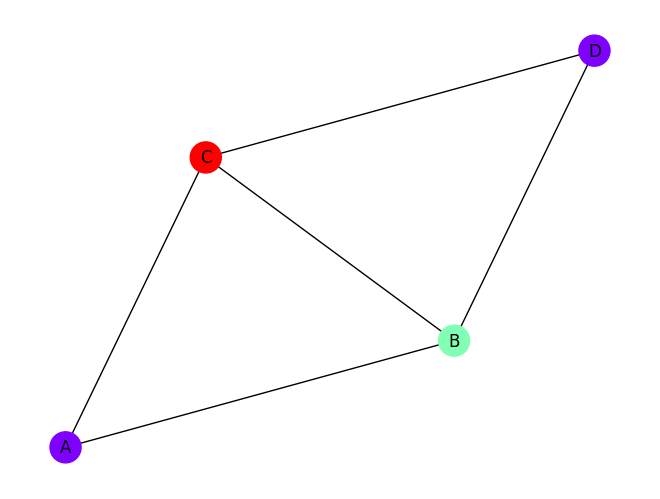

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Individual:
    def __init__(self, graph):
        self.graph = graph
        self.max_degree = max(d for _,d in G.degree())
        self.colors = self.initial_coloring()
        self.fitness = self.calc_fitness()

    # def is_feasible(self):
    #     for node in self.graph:
    #         for neighbor in self.graph[node]:
    #             if self.colors[node] == self.colors[neighbor]:
    #                 return False
    #     return True
        
        
    def initial_coloring(self):
        colors = {}
        # available_colors = set()
        # for node in self.graph:
        #     neighbor_colors = {colors[neighbor] for neighbor in self.graph[node] if neighbor in colors}
        #     color = 1
        #     while color in neighbor_colors:
        #         color += 1
        #     colors[node] = color
        #     available_colors.add(color)
       
        for node in self.graph:
            color = random.randint(1,self.max_degree + 1)
            colors[node] = color 
        return colors

    def calc_fitness(self):
        conflicts = 0 
        num_colors = max(self.colors.values())
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                if self.colors[node] == self.colors[neighbor]:
                    conflicts += 1
    
        fitness = conflicts + (num_colors / self.max_degree) 
        return fitness

def is_feasible(individual):
        for node in individual.graph:
            for neighbor in individual.graph[node]:
                if individual.colors[node] == individual.colors[neighbor]:
                    return False
        return True

def crossover(parent1, parent2):
    child_colors = {}
    for node in parent1.colors:
        child_colors[node] = parent1.colors[node] if random.random() < 0.5 else parent2.colors[node]
    child = Individual(parent1.graph)
    child.colors = child_colors
    child.fitness = child.calc_fitness()
    return child

def mutation(individual):
    node = random.choice(list(individual.colors.keys()))
    neighbor_colors = {individual.colors[neighbor] for neighbor in individual.graph[node]}
    available_colors = set(range(1, len(individual.graph) + 1)) - neighbor_colors
    if available_colors:
        individual.colors[node] = random.choice(list(available_colors))
        individual.fitness = individual.calc_fitness()

def ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness)
        # print(population[0].fitness)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            if random.random() < mutation_prob:
                mutation(child)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = min(population, key=lambda x: x.fitness)
    if is_feasible(best_solution):
        return best_solution, True
    else:
        return best_solution, False

def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=lambda x: x.fitness)

# Primer grafa za testiranje
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D'],
    'D': ['B', 'C']
}
population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

G = nx.Graph(graph)
start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)  # Pozicije čvorova
    nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()
else:
    print("Resenje nije nadjeno")

podaci=[]
podaci.append("small_1")
podaci.append("Broj boja: "+str(len(set(best_solution.colors.values()))))
podaci.append("Vreme: "+str(format_time(end_time - start_time))+" sekundi")

with open("../Rezultati/genetic_algorithm.txt", "w") as fajl:
    for podatak in podaci:
            fajl.write(f"{podatak}\n")
podaci.clear()

In [6]:
def appendToFile(filename,num_colors_used,elapsed_time):
    podaci.append(filename)
    podaci.append("Broj boja: "+str(num_colors_used))
    podaci.append("Vreme: "+str(elapsed_time)+"sekundi")

    
    with open("../Rezultati/genetic_algorithm.txt", "a") as fajl:
        for podatak in podaci:
                fajl.write(f"{podatak}\n")

    podaci.clear()

Minimalno bojenje grafa: {0: 10, 1: 4, 2: 12, 3: 12, 4: 6, 5: 6, 6: 1, 7: 12, 8: 12, 9: 10, 10: 1, 11: 10, 12: 10, 13: 9, 14: 9, 15: 11, 16: 13, 17: 3, 18: 2, 19: 3, 20: 10, 21: 2, 22: 7, 23: 3, 24: 12, 25: 7, 26: 8, 27: 4, 28: 6, 29: 13}
Broj korišćenih boja: 12


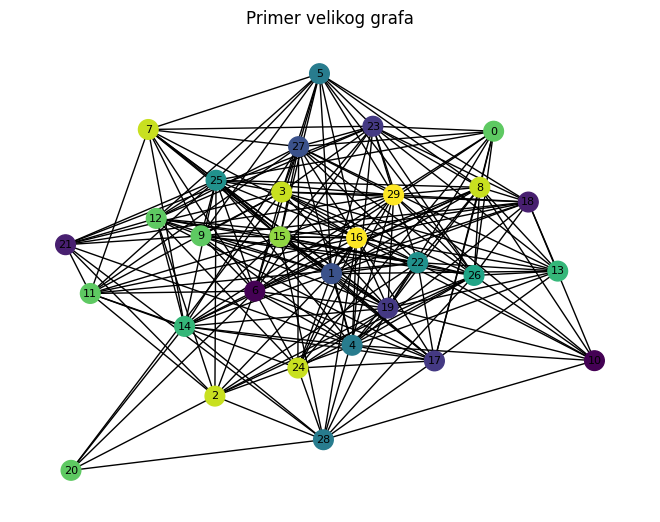

In [5]:
G = nx.erdos_renyi_graph(30,0.5)


population_size = 1000
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
else:
    print("Resenje nije nadjeno")

G = nx.Graph(G)
node_colors = [best_solution.colors[node] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
plt.title("Primer velikog grafa")
plt.show()

In [13]:
G = nx.erdos_renyi_graph(550,0.5)

Minimalno bojenje grafa: {'A': 2, 'B': 3, 'C': 1, 'D': 2}
Broj korišćenih boja: 3


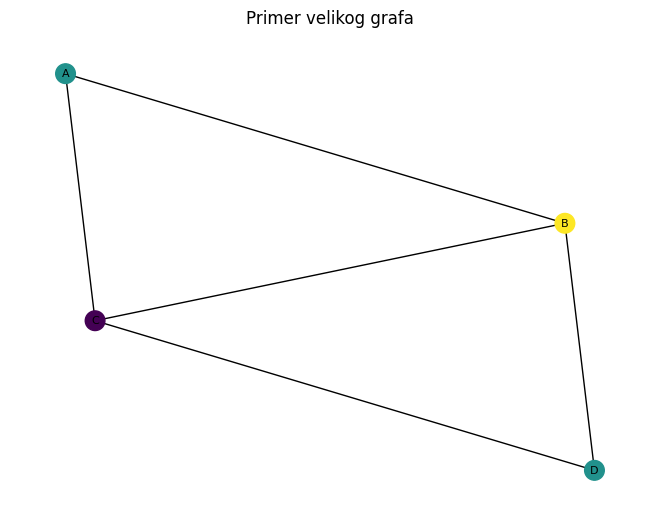

In [12]:
population_size = 30
num_generations = 30
tournament_size = 5
elitism_size = 5
mutation_prob = 0.1

best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer velikog grafa")
    plt.show()
else:
    print("Resenje nije nadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))




Execution time: 5.089380264282227 seconds
Minimalno bojenje grafa: {0: 1, 1: 13, 2: 8, 3: 6, 4: 30, 5: 19, 6: 7, 7: 27, 8: 4, 9: 2, 10: 16, 11: 25, 12: 12, 13: 14, 14: 9, 15: 3, 16: 15, 17: 22, 18: 5, 19: 20, 20: 21, 21: 17, 22: 29, 23: 26, 24: 10, 25: 23, 26: 24, 27: 11, 28: 18, 29: 28}
Broj korišćenih boja: 30


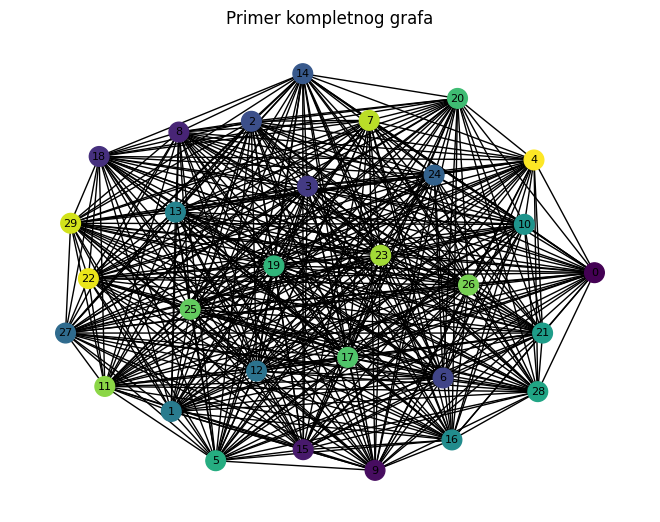

In [9]:
G = nx.complete_graph(30)


population_size = 100
num_generations = 100
tournament_size = 5
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Primer kompletnog grafa")
    plt.show()
    appendToFile("kompletan", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("kompletan", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    # print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.5476953983306885 seconds
Minimalno bojenje grafa: {'A': 2, 'B': 4, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': 1, 'H': 4, 'I': 3, 'J': 4}
Broj korišćenih boja: 4


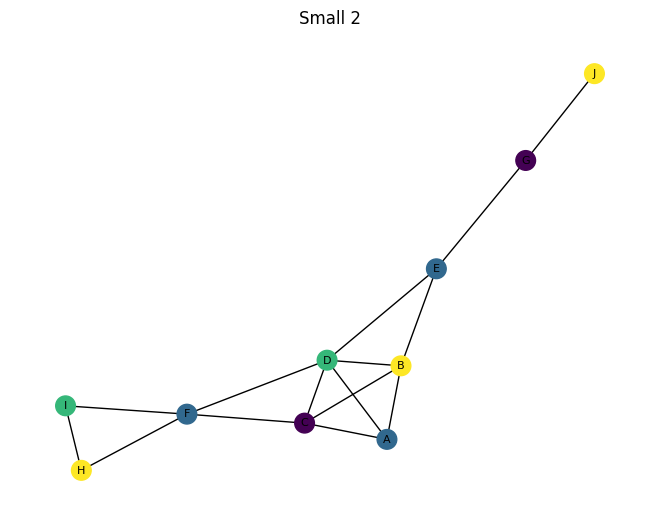

In [11]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D', 'E'],
    'C': ['A', 'B', 'D', 'F'],
    'D': ['A', 'B', 'C', 'E', 'F'],
    'E': ['B', 'D', 'G'],
    'F': ['C', 'D', 'H', 'I'],
    'G': ['E', 'J'],
    'H': ['F', 'I'],
    'I': ['F', 'H'],
    'J': ['G']
}


start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 2")
    plt.show()
    appendToFile("small_2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_2", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.3969907760620117 seconds
Minimalno bojenje grafa: {'A': 2, 'B': 1, 'C': 3, 'D': 4, 'E': 2}
Broj korišćenih boja: 4


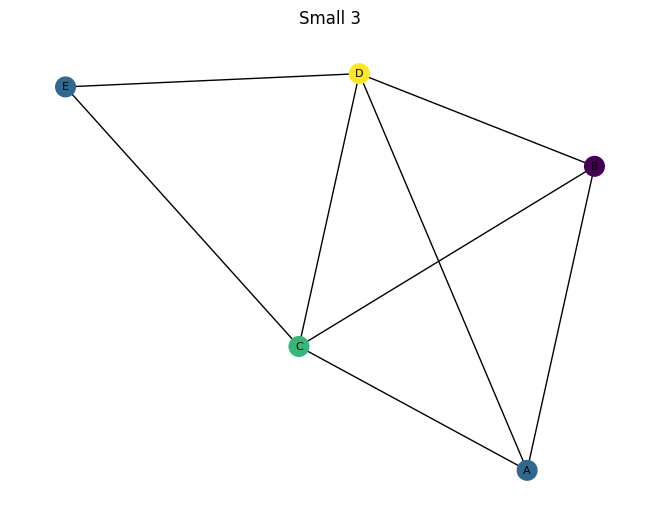

In [12]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['A', 'B', 'C', 'E'],
    'E': ['C', 'D']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 3")
    plt.show()
    appendToFile("small_3", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_3", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.33350586891174316 seconds
Minimalno bojenje grafa: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 2}
Broj korišćenih boja: 3


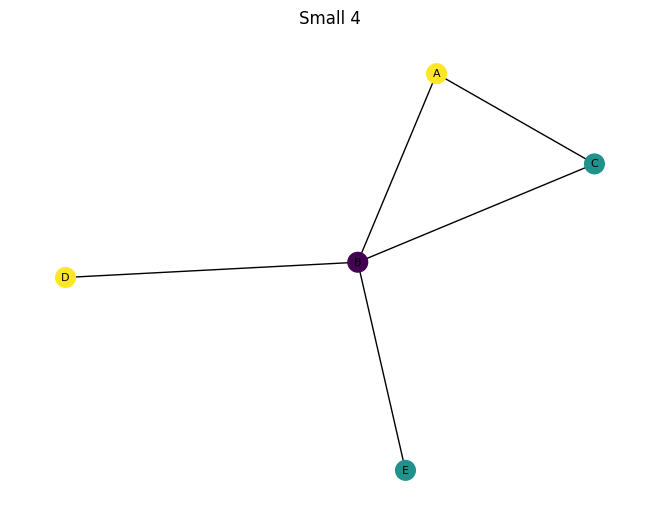

In [13]:
#small 4
graph = {
    'A' : ['B', 'C'],
    'B' : ['D', 'E'],
    'C' : ['A', 'B'],
    'D' : ['B'],
    'E' : ['B']
}
start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 4")
    plt.show()
    appendToFile("small_4", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_4", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.41168808937072754 seconds
Minimalno bojenje grafa: {'A': 2, 'B': 3, 'C': 3, 'D': 1, 'E': 1, 'F': 3, 'G': 2}
Broj korišćenih boja: 3


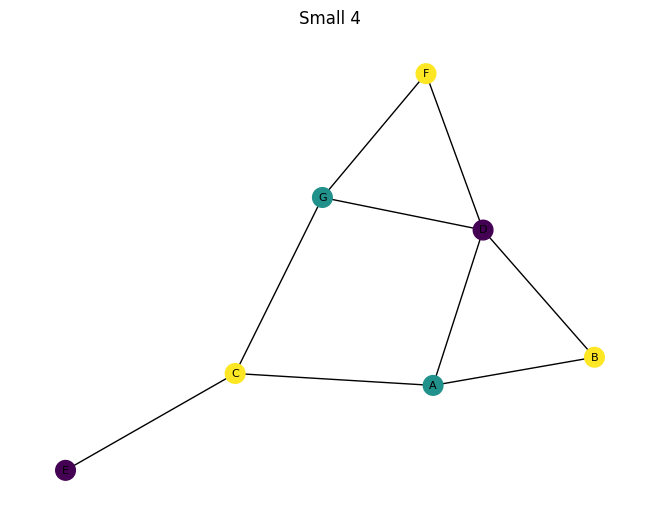

In [14]:
#small 5
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'D'],
    'C': ['A', 'E', 'G'],
    'D': ['A', 'B', 'F', 'G'],
    'E': ['C'],
    'F': ['D', 'G'],
    'G': ['C', 'D', 'F']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 5")
    plt.show()
    appendToFile("small_5", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_5", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 0.474520206451416 seconds
Minimalno bojenje grafa: {'A': 3, 'B': 4, 'C': 5, 'D': 2, 'E': 6, 'F': 1}
Broj korišćenih boja: 6


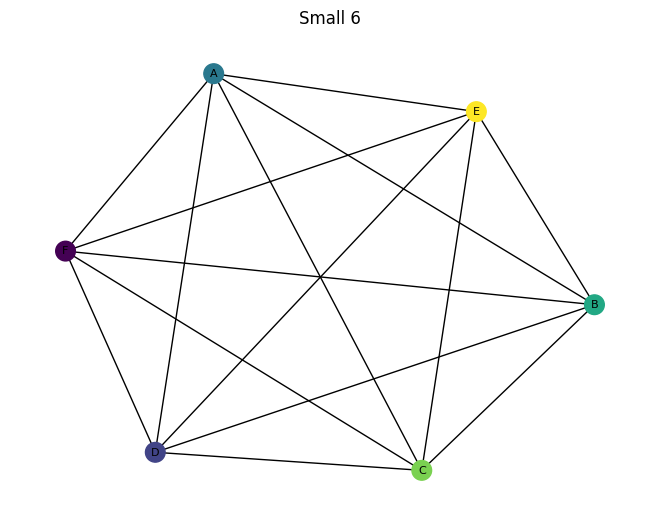

In [15]:
#small 6
graph = {
    'A': ['B', 'F', 'D', 'E'],
    'B': ['A', 'C', 'E', 'F'],
    'C': ['B', 'D', 'F', 'A'],
    'D': ['C', 'E', 'A', 'B'],
    'E': ['D', 'F', 'B', 'C'],
    'F': ['E', 'A', 'C', 'D']
}

start_time = time.time()
best_solution, is_good = ga(graph, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    G = nx.Graph(graph)
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Small 6")
    plt.show()
    appendToFile("small_6", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("small_6", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

In [17]:
def read_dimacs(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('e'):
                _, node1, node2 = line.strip().split()
                node1, node2 = int(node1), int(node2)
                G.add_edge(node1, node2)
    return G

Execution time: 34.88488578796387 seconds
Minimalno bojenje grafa: {1: 110, 2: 23, 3: 81, 4: 40, 5: 37, 6: 7, 7: 114, 8: 28, 9: 63, 10: 79, 11: 109, 12: 16, 13: 100, 14: 83, 15: 117, 16: 45, 33: 8, 36: 62, 41: 60, 43: 68, 45: 61, 47: 130, 48: 98, 51: 67, 54: 93, 56: 104, 57: 77, 59: 10, 60: 27, 61: 127, 70: 66, 71: 9, 72: 126, 73: 125, 74: 90, 75: 96, 76: 134, 77: 112, 78: 106, 80: 94, 82: 119, 85: 20, 87: 103, 89: 74, 90: 102, 91: 4, 95: 111, 97: 93, 102: 1, 103: 85, 104: 84, 105: 1, 106: 36, 113: 120, 116: 19, 117: 136, 118: 17, 120: 46, 121: 128, 122: 24, 123: 133, 124: 9, 125: 48, 126: 70, 127: 59, 128: 65, 129: 107, 130: 39, 131: 54, 132: 89, 133: 93, 134: 13, 135: 78, 141: 84, 142: 80, 143: 115, 144: 135, 147: 91, 148: 6, 149: 27, 151: 6, 157: 3, 158: 131, 159: 4, 160: 22, 161: 14, 162: 1, 163: 77, 165: 44, 167: 20, 168: 98, 169: 47, 170: 10, 171: 31, 172: 107, 173: 6, 174: 9, 175: 129, 176: 47, 177: 135, 178: 136, 179: 120, 180: 91, 181: 11, 185: 38, 186: 2, 187: 87, 188: 99, 18

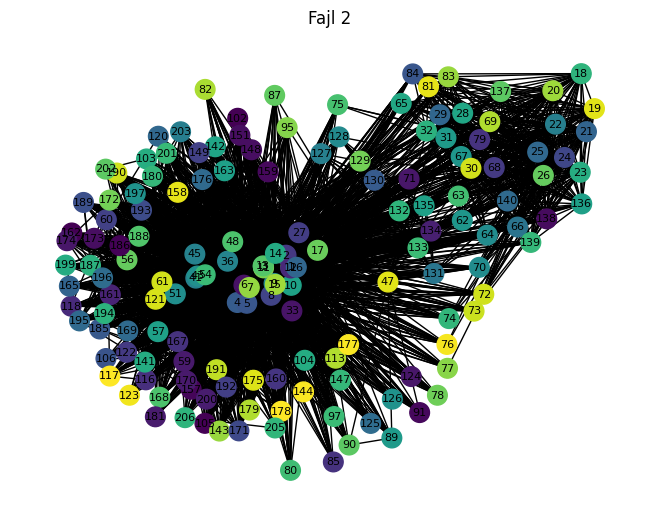

In [19]:
filename = '../File/fajl2.txt'

G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("Fajl 2")
    plt.show()
    appendToFile("fajl2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("fajl2", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 1725.3650135993958 seconds
Minimalno bojenje grafa: {1: 63, 2: 24, 4: 48, 7: 51, 9: 34, 13: 3, 15: 48, 18: 72, 20: 31, 25: 24, 27: 21, 30: 9, 32: 61, 36: 74, 38: 10, 41: 50, 43: 49, 49: 38, 51: 91, 54: 91, 56: 87, 60: 83, 62: 20, 65: 53, 67: 19, 72: 70, 74: 91, 77: 40, 79: 79, 83: 70, 85: 9, 88: 7, 90: 13, 97: 32, 99: 65, 102: 88, 104: 76, 108: 33, 110: 1, 113: 84, 115: 3, 120: 95, 122: 46, 125: 70, 127: 69, 131: 71, 133: 78, 136: 78, 138: 14, 144: 35, 146: 95, 149: 79, 151: 91, 155: 6, 157: 18, 160: 48, 162: 11, 167: 29, 169: 60, 172: 57, 174: 92, 178: 44, 180: 59, 183: 5, 185: 82, 3: 89, 6: 87, 8: 79, 12: 89, 14: 74, 17: 55, 19: 74, 24: 5, 26: 49, 29: 31, 31: 69, 35: 92, 37: 31, 40: 3, 42: 72, 48: 39, 50: 83, 53: 60, 55: 55, 59: 92, 61: 54, 64: 7, 66: 26, 71: 62, 73: 56, 76: 20, 78: 26, 82: 3, 84: 44, 87: 62, 89: 67, 96: 1, 98: 33, 101: 17, 103: 49, 107: 22, 109: 71, 112: 42, 114: 7, 119: 22, 121: 95, 124: 67, 126: 10, 130: 79, 132: 20, 135: 82, 137: 61, 143: 59, 145:

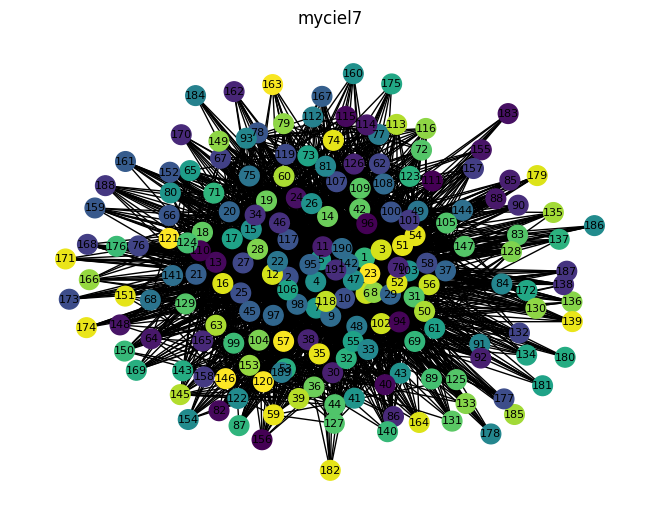

In [30]:
filename = '../File/myciel7.txt'

G = read_dimacs(filename)



start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("myciel7")
    plt.show()
    appendToFile("myciel7", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("myciel7", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 10.174602031707764 seconds
Minimalno bojenje grafa: {1: 1, 16: 10, 20: 6, 94: 7, 80: 4, 57: 2, 62: 11, 89: 12, 113: 14, 5: 6, 21: 12, 15: 2, 2: 3, 24: 1, 30: 13, 77: 5, 92: 6, 41: 4, 55: 25, 6: 5, 54: 7, 3: 9, 100: 3, 44: 5, 105: 12, 91: 11, 42: 14, 103: 10, 90: 2, 22: 8, 67: 1, 31: 11, 115: 3, 71: 12, 4: 10, 38: 13, 85: 14, 49: 3, 50: 14, 61: 2, 63: 12, 99: 13, 96: 7, 84: 14, 107: 11, 12: 12, 56: 3, 26: 14, 72: 10, 32: 12, 76: 9, 34: 4, 53: 7, 11: 21, 87: 2, 13: 3, 14: 13, 60: 12, 7: 8, 66: 14, 83: 1, 118: 5, 48: 9, 10: 14, 120: 3, 25: 7, 75: 11, 64: 1, 28: 13, 51: 6, 8: 11, 73: 4, 18: 5, 86: 10, 104: 8, 98: 1, 46: 1, 9: 7, 33: 12, 69: 11, 58: 14, 116: 3, 17: 9, 70: 8, 101: 6, 119: 8, 35: 2, 36: 6, 117: 14, 19: 5, 43: 9, 102: 10, 23: 6, 88: 13, 97: 4, 68: 8, 29: 10, 95: 4, 52: 6, 65: 12, 59: 10, 108: 13, 39: 3, 37: 14, 112: 8, 47: 1, 27: 11, 79: 4, 93: 1, 114: 14, 74: 4, 109: 2, 106: 9, 110: 4, 78: 6, 111: 12, 81: 5, 40: 10, 82: 7, 45: 12}
Broj korišćenih boja: 16


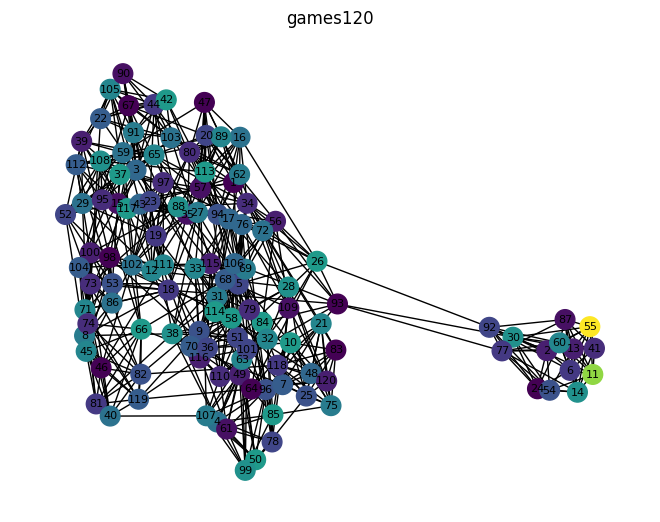

In [24]:
filename = ('../File/games120.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("games120")
    plt.show()
    appendToFile("games120", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("games120", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 138.25595664978027 seconds
Minimalno bojenje grafa: {2: 143, 1: 29, 3: 89, 5: 73, 4: 69, 6: 136, 7: 111, 8: 204, 9: 86, 10: 2, 11: 31, 12: 144, 13: 30, 14: 134, 15: 61, 16: 120, 17: 123, 18: 82, 19: 48, 20: 33, 21: 47, 22: 75, 23: 59, 24: 100, 25: 148, 26: 27, 27: 166, 28: 19, 29: 109, 30: 108, 31: 199, 32: 42, 33: 71, 34: 107, 35: 12, 36: 41, 37: 125, 38: 136, 39: 6, 40: 100, 41: 44, 42: 72, 43: 104, 44: 57, 45: 63, 46: 1, 47: 43, 48: 146, 49: 148, 50: 111, 51: 68, 52: 30, 53: 94, 54: 45, 55: 107, 56: 18, 57: 9, 58: 37, 59: 101, 60: 26, 61: 52, 62: 93, 63: 188, 64: 152, 65: 88, 66: 102, 67: 66, 68: 126, 69: 22, 70: 25, 71: 221, 72: 55, 73: 135, 74: 13, 75: 91, 76: 122, 77: 116, 78: 102, 79: 37, 80: 98, 81: 106, 82: 140, 83: 32, 84: 44, 85: 76, 86: 69, 87: 127, 88: 85, 89: 45, 90: 130, 91: 57, 92: 15, 93: 185, 94: 126, 95: 54, 96: 139, 97: 135, 98: 95, 99: 36, 100: 63, 101: 207, 102: 20, 103: 112, 104: 96, 105: 28, 106: 133, 107: 14, 108: 65, 109: 50, 110: 33, 111: 5, 1

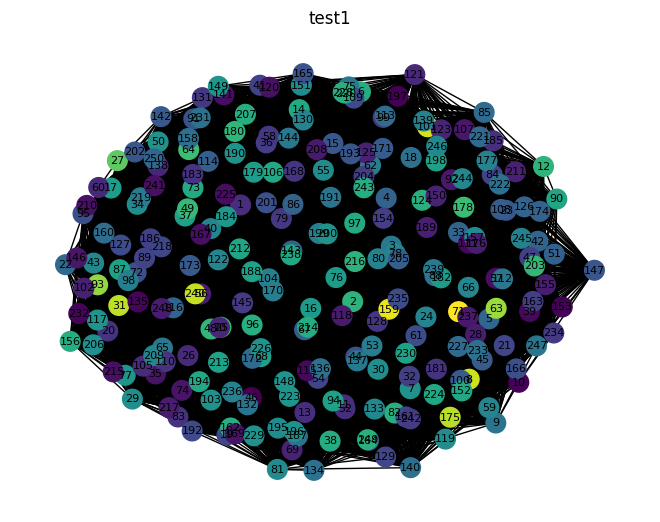

In [25]:
filename = ('../File/test1.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test1")
    plt.show()
    appendToFile("test1", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test1", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

In [26]:
filename = ('../File/test2.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test2")
    plt.show()
    appendToFile("test2", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test1", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

Execution time: 131.7991259098053 seconds
Resenje nije nadjeno
Broj korišćenih boja: 103


Execution time: 0.7254383563995361 seconds
Minimalno bojenje grafa: {1: 3, 2: 1, 3: 2, 4: 3, 5: 2, 6: 3, 7: 1, 8: 3, 9: 1, 10: 2, 11: 1}
Broj korišćenih boja: 3


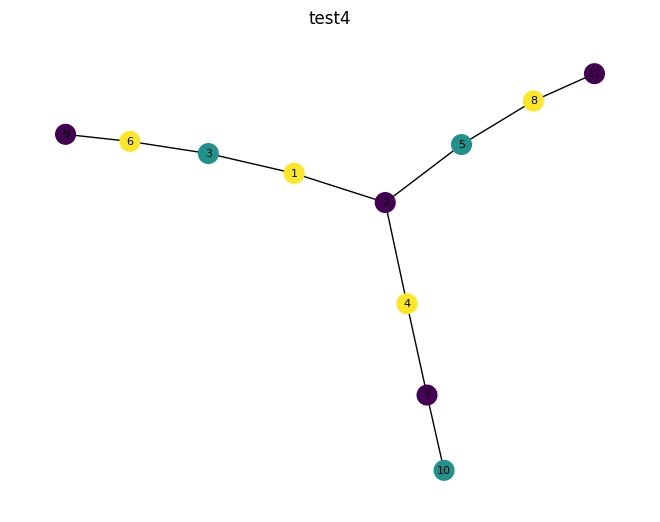

In [27]:
filename = ('../File/test4.txt') 
G = read_dimacs(filename)

start_time = time.time()
best_solution, is_good = ga(G, population_size, num_generations, tournament_size, elitism_size, mutation_prob)
end_time = time.time()

elapsed_time = end_time - start_time
print("Execution time:", elapsed_time, "seconds")

if is_good:
    print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))
    node_colors = [best_solution.colors[node] for node in G.nodes()]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color=node_colors, font_size=8)
    plt.title("test4")
    plt.show()
    appendToFile("test4", len(set(best_solution.colors.values())), format_time(end_time - start_time))
else:
    print("Resenje nije nadjeno")
    appendToFile("test4", -1, "Resenje nije pronadjeno")
    # print("Minimalno bojenje grafa:", best_solution.colors)
    print("Broj korišćenih boja:", len(set(best_solution.colors.values())))

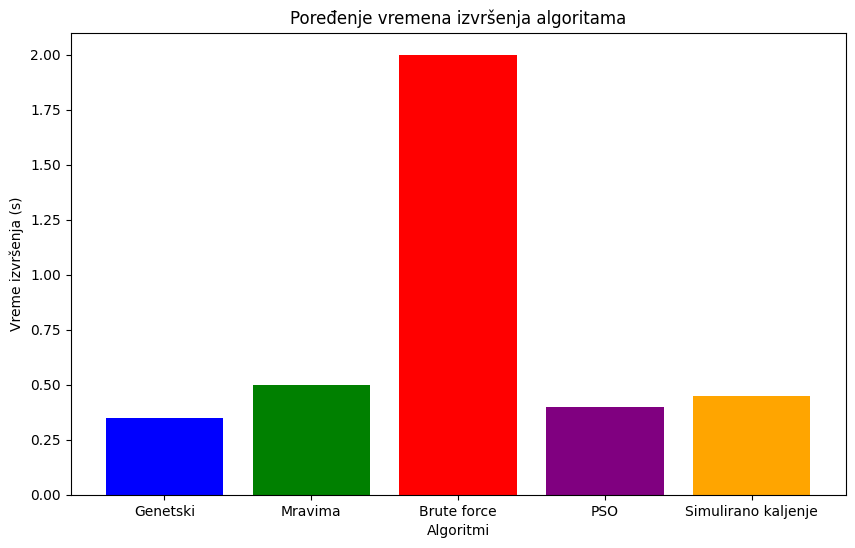

In [28]:
import matplotlib.pyplot as plt

algorithms = ['Genetski', 'Mravima', 'Brute force', 'PSO', 'Simulirano kaljenje']
times = [0.35, 0.50, 2.0, 0.40, 0.45]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, times, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algoritmi')
plt.ylabel('Vreme izvršenja (s)')
plt.title('Poređenje vremena izvršenja algoritama')
plt.show()